This code demonstrates how to classify fashin MNIT data set by training a neural network using PyTorch..

Loading Data through torchvision

In [1]:
import torch
from torchvision import datasets, transforms
import helper

In [2]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images

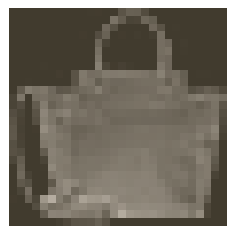

In [3]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

### Building the network

Each image is 28x28 pixels which is a total of 784 pixels and there are 10 classes.
Importing the required libraries

In [4]:
from torch import nn, optim
import torch.nn.functional as F

In [5]:
# Defining the network architecture

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,256)
        self.fc2 = nn.Linear(256,128)
        self.fc3 = nn.Linear(128,64)
        self.fc4 = nn.Linear(64,10)
    
    def forward(self,x):
        #make sure input tensor is flattened
        x = x.view(x.shape[0],-1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim = 1)
        
        return x

### Train the network

The training pass is a straighforward process:
- Make a forward pass through the network to get the logits
- Use logits to calculate the loss
- Perform a backward pass through the network with loss.backward() to calculate the gradients
- Take a step with the optimizer to update the weights

By adjusting the hyper parameters (hidden units, learning rates etc), the training loss should be less than 0.4

In [6]:
# To define the network, define the criterion and the optimizer
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(),lr = 0.001)

In [ ]:
# Training the network :
epochs = 5

for e in range(epochs):
    running_loss = 0
    for images, lables in trainloader:
        #making a forward pass
        log_ps = model(images)
        # Using logits to calculate the loss
        loss = criterion(log_ps, lables)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")


Training loss: 0.5204228288424548
Training loss: 0.37506903870019326
Training loss: 0.3364678629235164
Training loss: 0.3122186139940834


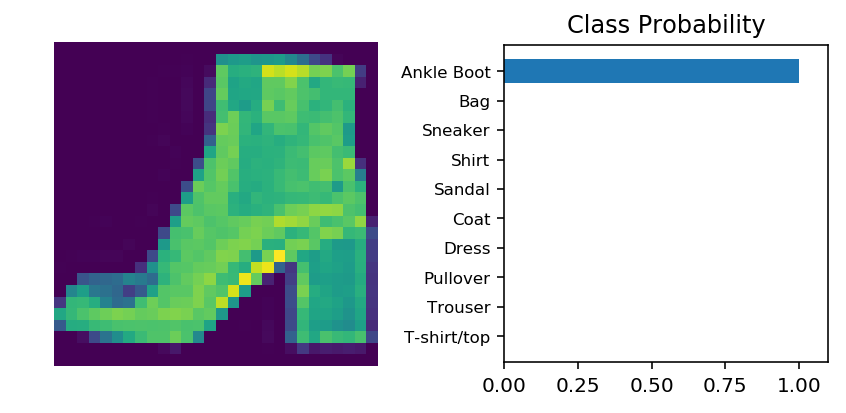

In [30]:


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[1]

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))

# Plot the image and probabilities
helper.view_classify(img, ps, version='Fashion')

